In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv ('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

##PRAPROCESSING

In [6]:
df.columns = df.columns.str.lower()

# Menampilkan hasil
print(df)

     age sex chestpaintype  restingbp  cholesterol  fastingbs restingecg  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     maxhr exerciseangina  oldpeak st_slope  heartdisease  
0      172              N  

In [7]:
df['sex'] = df['sex'].map({'F': 0, 'M': 1})

In [8]:
df['chestpaintype'] = df['chestpaintype'].map({'ATA': 0, 'NAP': 1, 'ASY': 2})

In [9]:
df['restingecg'] = df['restingecg'].map({'Normal': 0, 'ST': 1})

In [11]:
df['exerciseangina'] = df['exerciseangina'].map({'N': 0, 'Y': 1})

In [10]:
df['st_slope'] = df['st_slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

In [12]:
df.describe()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
count,918.000000,918.000000,872.000000,918.000000,918.000000,918.000000,730.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.370413,132.396514,198.799564,0.233115,0.243836,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.794178,18.514154,109.384145,0.423046,0.429689,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,2.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,2.000000,200.000000,603.000000,1.000000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [13]:
df.isnull().sum()

age                 0
sex                 0
chestpaintype      46
restingbp           0
cholesterol         0
fastingbs           0
restingecg        188
maxhr               0
exerciseangina      0
oldpeak             0
st_slope            0
heartdisease        0
dtype: int64

In [14]:
df.dropna(subset=['chestpaintype'], inplace=True)


In [15]:
df.dropna(subset=['restingecg'], inplace=True)


In [16]:
df.dropna(subset=['st_slope'], inplace=True)


In [17]:
df['chestpaintype'] = df['chestpaintype'].astype(int)

In [18]:
df['restingecg'] = df['restingecg'].astype(int)

In [19]:
df['st_slope'] = df['st_slope'].astype(int)

In [20]:
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [21]:
df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             700 non-null    int64  
 1   sex             700 non-null    int64  
 2   chestpaintype   700 non-null    int64  
 3   restingbp       700 non-null    int64  
 4   cholesterol     700 non-null    int64  
 5   fastingbs       700 non-null    int64  
 6   restingecg      700 non-null    int64  
 7   maxhr           700 non-null    int64  
 8   exerciseangina  700 non-null    int64  
 9   oldpeak         700 non-null    float64
 10  st_slope        700 non-null    int64  
 11  heartdisease    700 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 71.1 KB


In [23]:
df['heartdisease'].value_counts()

heartdisease
1    387
0    313
Name: count, dtype: int64

##EDA

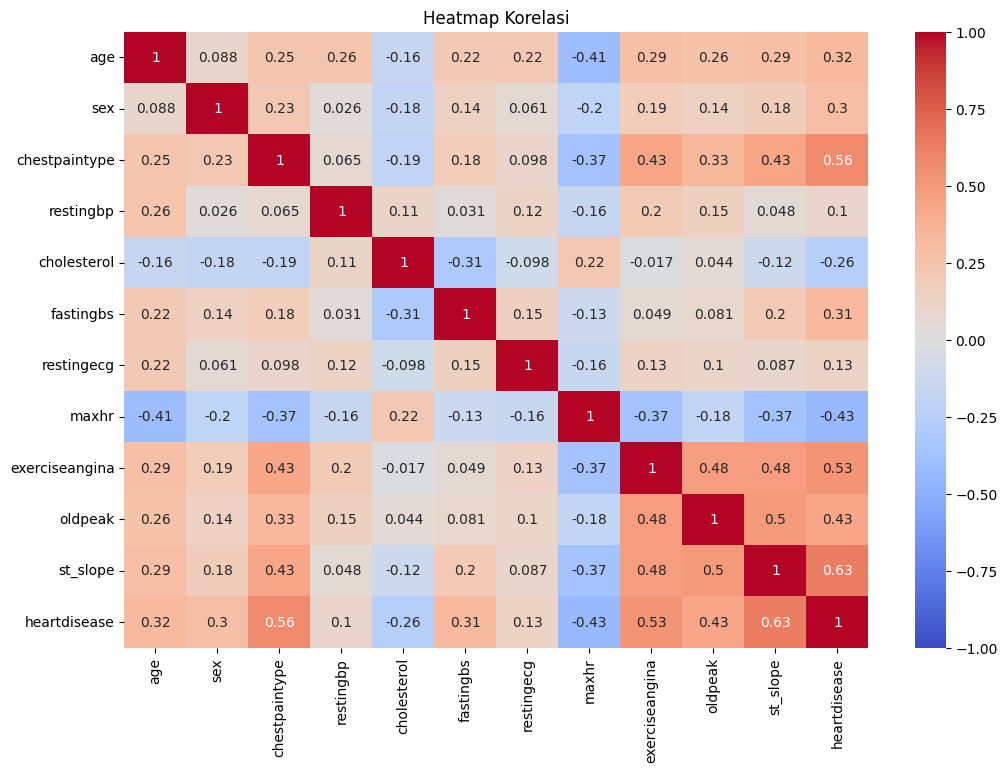

In [24]:
# Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi')
plt.show()

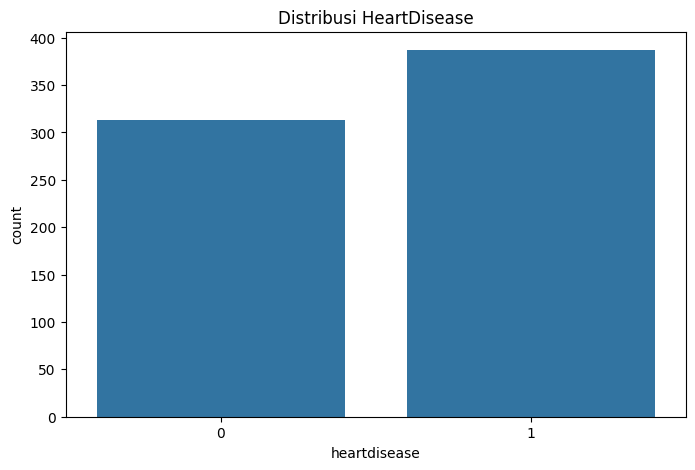

In [25]:
# Distribusi HeartDisease
plt.figure(figsize=(8, 5))
sns.countplot(x='heartdisease', data=df)
plt.title('Distribusi HeartDisease')
plt.show()

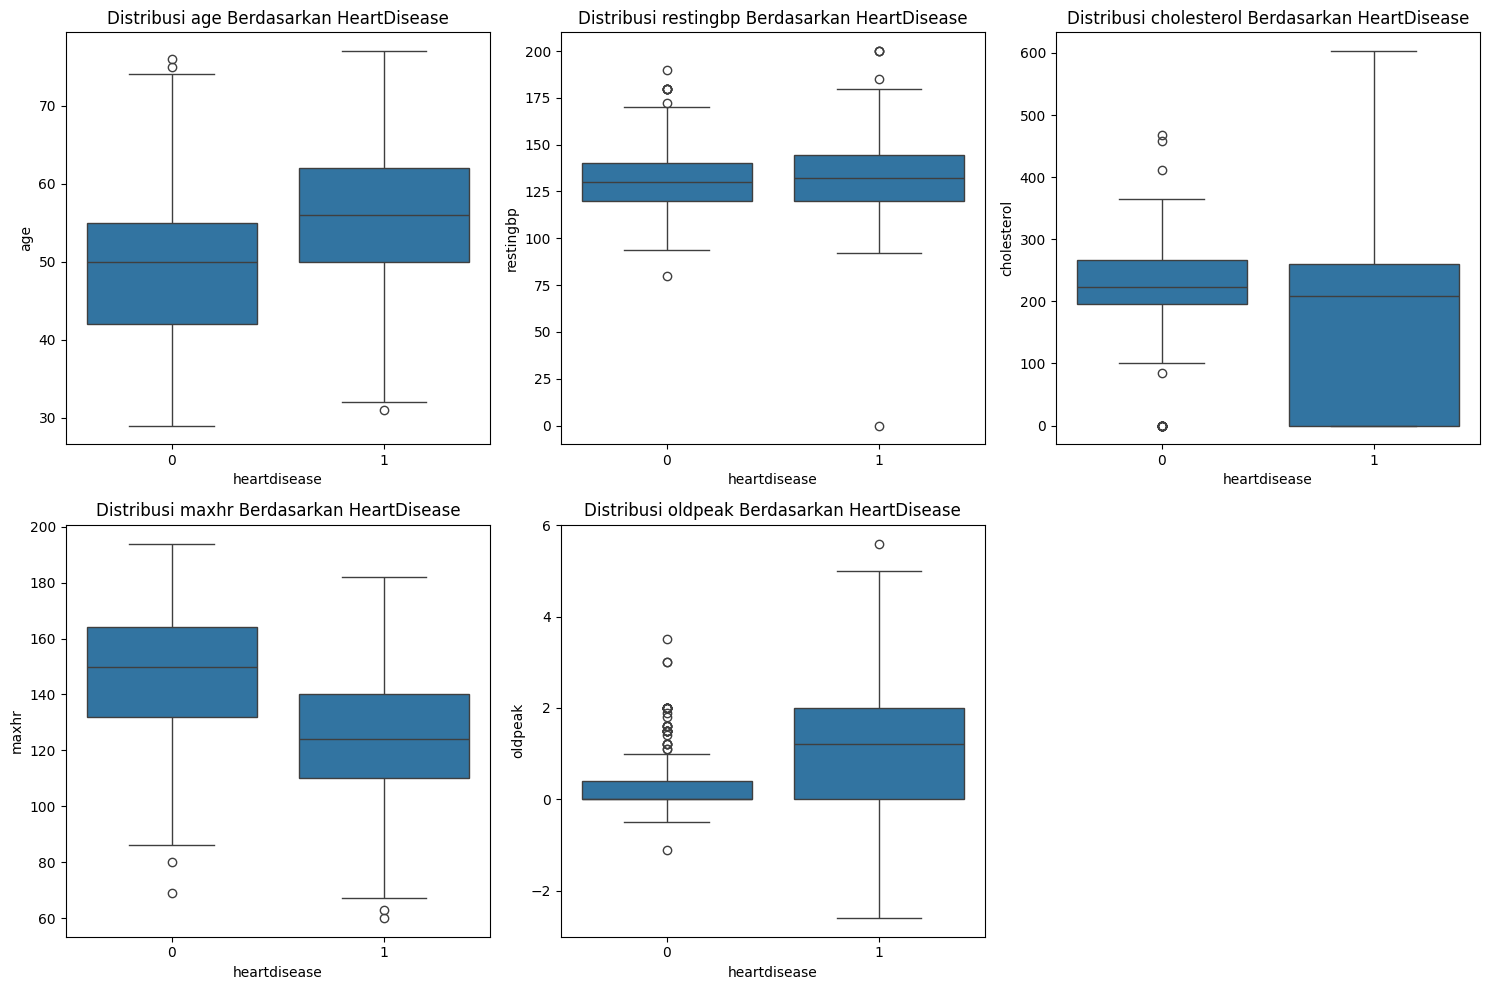

In [26]:
# Analisis Bivariat: Variabel Numerik vs. HeartDisease
num_columns = ['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='heartdisease', y=col, data=df)
    plt.title(f'Distribusi {col} Berdasarkan HeartDisease')
plt.tight_layout()
plt.show()

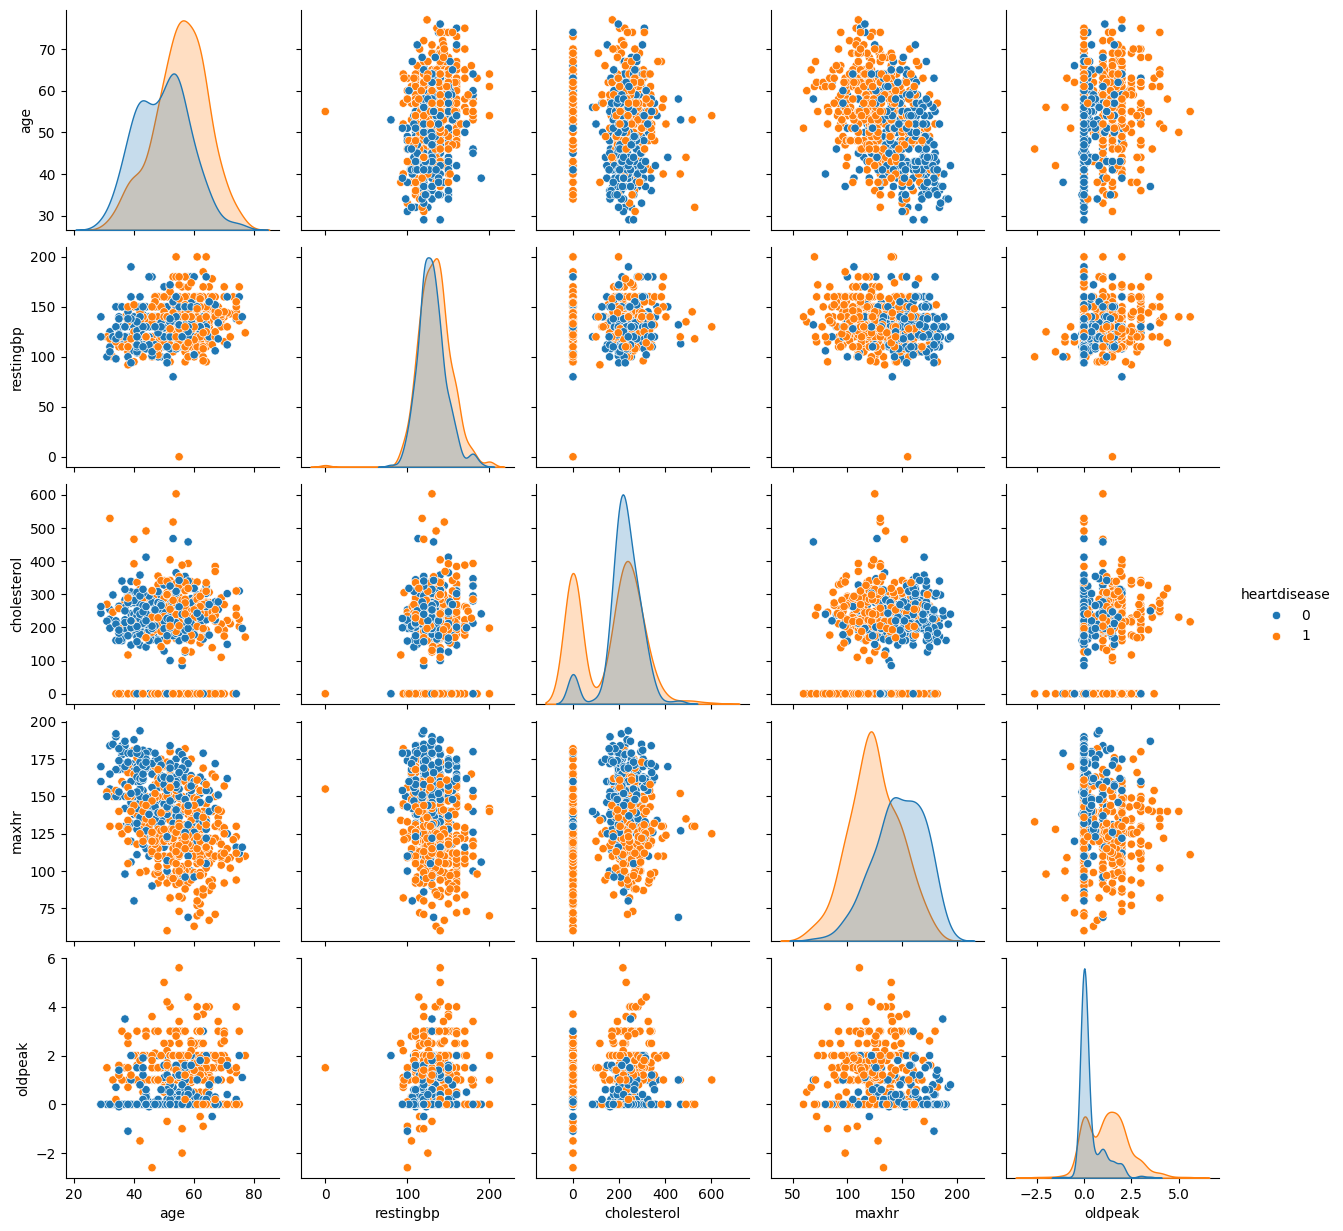

In [27]:
# Pairplot
sns.pairplot(df, hue='heartdisease', vars=num_columns)
plt.show()

##MODEL

In [28]:
x = df.drop(columns='heartdisease', axis=1)
y = df['heartdisease']

In [29]:
print(x)

     age  sex  chestpaintype  restingbp  cholesterol  fastingbs  restingecg  \
0     40    1              0        140          289          0           0   
1     49    0              1        160          180          0           0   
2     37    1              0        130          283          0           1   
3     48    0              2        138          214          0           0   
4     54    1              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
910   41    1              0        120          157          0           0   
912   57    0              2        140          241          0           0   
914   68    1              2        144          193          1           0   
915   57    1              2        130          131          0           0   
917   38    1              1        138          175          0           0   

     maxhr  exerciseangina  oldpeak  st_slope  
0  

In [30]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
910    0
912    1
914    1
915    1
917    0
Name: heartdisease, Length: 700, dtype: int64


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [32]:
print(x.shape, x_train.shape,x_test.shape)

(700, 11) (560, 11) (140, 11)


In [33]:
 model = LogisticRegression()

In [34]:
model.fit(x_train, y_train)

C:\Users\radhi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##evaluasi

In [35]:
x_train_predicition = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predicition, y_train)

In [36]:
print('akurasi data training :', training_data_accuracy)

akurasi data training : 0.8803571428571428


In [37]:
x_test_predicition = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predicition, y_test)

In [38]:
print('akurasi data testing :', test_data_accuracy)

akurasi data testing : 0.9214285714285714


##PREDIKSI

In [39]:
input_data = (40,1,0,140,289,0,0,172,0,0.0,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print ('Pasien Tidak Terkena Penyakit Jantung')
else:
  print ('Pasien Terkena Penyakit Jantung')

[0]
Pasien Tidak Terkena Penyakit Jantung


C:\Users\radhi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


##SIMPAN MODEL

In [40]:
import pickle

In [41]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))